# Task 3

In [1]:
from vector_fields import read_vectorfield_data, estimate_vectors
from function_approximation import approx_lin_func, approx_nonlin_func, plot_func_over_data, compute_bases
import matplotlib.pyplot as plt
import numpy as np
import math

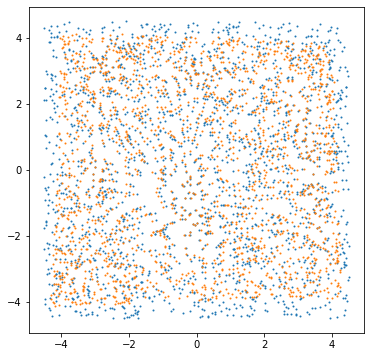

In [2]:
# read the vector field data
x0, x1 = read_vectorfield_data(base_filename="nonlinear_vectorfield_data")
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(x0[:,0], x0[:,1], s=1)
ax.scatter(x1[:,0], x1[:,1], s=1)
plt.show()

#### Part 1

Try to estimate a linear operator A for the nonlinear vector fields with unknown deltaT

In [3]:
delta_t = 100
v = (x1 - x0) / delta_t
A, residuals, _, _ = approx_lin_func(data=(x0,v))

In [4]:
def compute_step(A, x0, delta_t):
    return x0 + delta_t * x0 @ A.T

In [5]:
# mse at initial positions
np.linalg.norm(x1 - x0)**2 / len(x0)

0.05052801805605719

0.05052801805605719
0.050501517238060456
0.0504750440660612
0.050448598536701035
0.050422180646621816
0.05039579039246586
0.05036942777087575
0.05034309277849439
0.05031678541196506
0.050290505667931314
0.0502642535430371
0.05023802903392668
0.05021183213724463
0.05018566284963589
0.05015952116774567
0.05013340708821962
0.05010732060770362
0.0500812617228439
0.050055230430287104
0.05002922672668012
0.05000325060867019
0.04997730207290491
0.04995138111603218
0.04992548773470028
0.04989962192555778
0.04987378368525359
0.04984797301043695
0.04982218989775743
0.049796434343864965
0.04977070634540979
0.0497450058990425
0.04971933300141397
0.049693687649175464
0.049668069838978535
0.04964247956747512
0.04961691683131742
0.04959138162715804
0.04956587395164985
0.04954039380144608
0.04951494117320036
0.04948951606356651
0.0494641184691988
0.049438748386751816
0.04941340581288042
0.0493880907442398
0.04936280317748558
0.04933754310927363
0.04931231053626017
0.049287105455101746
0.04926192786245

0.04130237289730242
0.041288056964174265
0.041273767189326876
0.041259503569549695
0.04124526610163245
0.041231054782365224
0.041216869608538376
0.04120271057694258
0.04118857768436888
0.04117447092760862
0.041160390303453434
0.04114633580869531
0.04113230744012655
0.04111830519453975
0.041104329068727866
0.04109037905948412
0.0410764551636021
0.041062557377875716
0.04104868569909914
0.04103484012406692
0.04102102064957392
0.04100722727241527
0.04099345998938647
0.040979718797283356
0.04096600369290202
0.040952314673038906
0.04093865173449079
0.04092501487405476
0.040911404088528176
0.04089781937470877
0.040884260729394606
0.04087072814938403
0.0408572216314757
0.04084374117246863
0.04083028676916211
0.0408168584183558
0.04080345611684961
0.04079007986144385
0.040776729648939074
0.0407634054761362
0.040750107339836444
0.04073683523684135
0.040723589163952786
0.04071036911797294
0.04069717509570428
0.040684007093949634
0.04067086510951215
0.04065774913919526
0.04064465917980274
0.040631

0.037597627220322116
0.037593720854910334
0.03758983936406513
0.03758598274470387
0.03758215099374423
0.03757834410810424
0.037574562084702126
0.03757080492045655
0.0375670726122864
0.0375633651571109
0.03755968255184956
0.037556024793422245
0.03755239187874907
0.0375487838047505
0.03754520056834729
0.037541642166460484
0.03753810859601149
0.037534599853921956
0.037531115937113876
0.037527656842509555
0.037524222567031584
0.03752081310760288
0.03751742846114661
0.03751406862458637
0.03751073359484597
0.03750742336884952
0.03750413794352145
0.037500877315786545
0.03749764148256987
0.03749443044079678
0.03749124418739293
0.03748808271928429
0.037484946033397186
0.03748183412665819
0.03747874699599419
0.03747568463833243
0.03747264705060036
0.037469634229725886
0.03746664617263704
0.03746368287626232
0.03746074433753043
0.03745783055337046
0.03745494152071171
0.037452077236483874
0.037449237697616926
0.037446422901041096
0.037443632843687014
0.03744086752248553
0.03743812693436786
0.03743

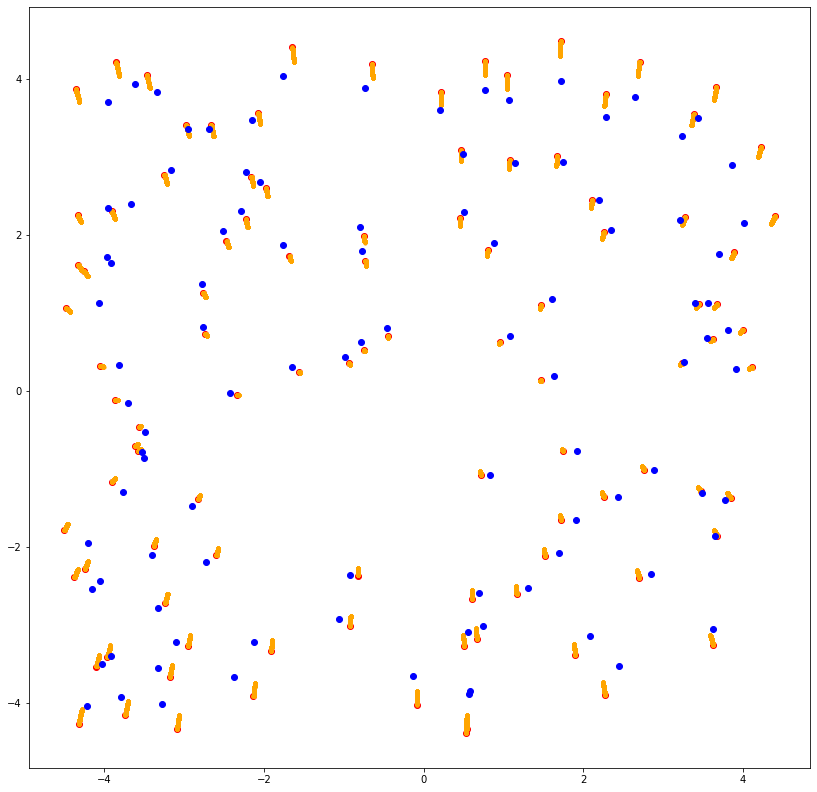

In [6]:
step = delta_t / 1000
end_time = delta_t
slc = 100
new_x0 = x0
prev_lstsq = (math.inf, math.inf)
plt.rcParams["figure.figsize"] = (14,14)
plt.scatter(new_x0[:slc,0],new_x0[:slc,1], c='red')
for i in range(int(end_time / step)):
    curr_lstsq = np.linalg.norm(x1 - new_x0)**2 / len(new_x0)
    print(curr_lstsq)
    if curr_lstsq < prev_lstsq[0]:
        prev_lstsq = (curr_lstsq, step*i + step)
    new_x0 = compute_step(A, new_x0, step)
    plt.scatter(new_x0[:slc,0],new_x0[:slc,1], c='orange', s=10)
plt.scatter(x1[:slc,0],x1[:slc,1], c='blue')
print(prev_lstsq)
plt.show()


#### Part 2

Try to approximate the vector field using radial basis functions (with the number of centers between
100 and 1000)

In [7]:
n_bases = 500
delta_t = 0.01
v = (x1 - x0) / delta_t
centers = np.random.choice(x0.ravel(), replace=False, size=n_bases)
C, residuals, ranks, singv, centers, eps, phi = approx_nonlin_func(data=(x0,v), n_bases=n_bases, eps=10, centers=centers)
residuals, ranks

(array([], dtype=float64), 10)

In [8]:
def compute_step(C, phi, x0, delta_t):
    return x0 + delta_t * phi @ C

In [9]:
# mse at initial positions
np.linalg.norm(x1 - x0)**2 / len(x0)

0.05052801805605719

(0.03516094680747433, 0.013000000000000001)


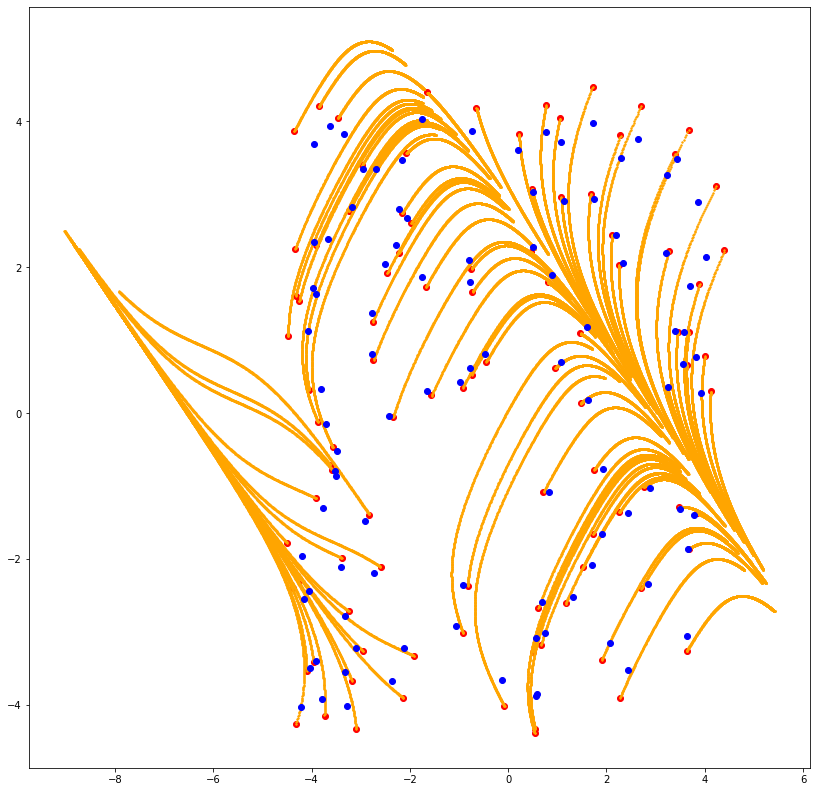

In [12]:
step = delta_t / 10 
end_time = delta_t*100
new_x0 = x0
slc=100
prev_lstsq = (math.inf, math.inf)
plt.rcParams["figure.figsize"] = (14,14)
plt.scatter(new_x0[:slc,0],new_x0[:slc,1], c='red')
for i in range(int(end_time / step)):
    curr_lstsq = np.linalg.norm(x1 - new_x0)**2 / len(new_x0)
    if curr_lstsq < prev_lstsq[0]:
        prev_lstsq = (curr_lstsq, step*i + step)
    new_x0 = compute_step(C, phi, new_x0, step)
#     print(curr_lstsq)
    plt.scatter(new_x0[:slc,0],new_x0[:slc,1], c='orange', s=2)
    phi, centers = compute_bases(points=new_x0, centers=centers, eps=eps, n_bases=n_bases)
plt.scatter(x1[:slc,0],x1[:slc,1], c='blue')
print(prev_lstsq)
plt.show()